<a href="https://colab.research.google.com/github/AE-H1ryu/BDAO-IMA/blob/main/Big_data_IMA_attribute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Authenticate and access Google Cloud services
from google.colab import auth
auth.authenticate_user()

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

In [ ]:
# Import the necessary libraries
from google.cloud import storage
from google.cloud import bigquery

# First make connection to BigQuery
# Replace 'your-project-id' with your Google Cloud project ID
# Replace 'your-dataset-name' with your dataset name
project_id = "big-data-group4-422711"
dataset_name = "IMA_datatset"
table_name = "restaurant_data" # if you make changes previously, then here you need to make according change

bigquery_client = bigquery.Client(project=project_id)

In [ ]:
# Query data from selected columns from the table
query = f"""
    SELECT stars, name , review_count, is_open, RestaurantsDelivery, OutdoorSeating, BusinessAcceptsCreditCards, BusinessParking, BikeParking, RestaurantsPriceRange2, RestaurantsTakeOut, ByAppointmentOnly, WiFi, Alcohol,
                              Caters, RestaurantsAttire, RestaurantsReservations, Ambience, GoodForKids, CoatCheck, DogsAllowed, RestaurantsTableService, RestaurantsGoodForGroups,
                               WheelchairAccessible, HasTV, HappyHour, DriveThru, NoiseLevel, GoodForMeal, BusinessAcceptsBitcoin, Smoking, Music, GoodForDancing, BestNights,
                               BYOB, Corkage, Parking
    FROM `{project_id}.{dataset_name}.{table_name}`
"""

query_job = bigquery_client.query(query)
results = query_job.result()

restaurant_df = query_job.to_dataframe()
restaurant_df.head()

,stars,name,review_count,is_open,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,Ambience,GoodForKids,CoatCheck,DogsAllowed,RestaurantsTableService,RestaurantsGoodForGroups,WheelchairAccessible,HasTV,HappyHour,DriveThru,NoiseLevel,GoodForMeal,BusinessAcceptsBitcoin,Smoking,Music,GoodForDancing,BestNights,BYOB,Corkage,Parking
0,4.0,Hibachi Express,20,1,True,<NA>,<NA>,None,<NA>,2,True,<NA>,None,None,<NA>,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
1,3.5,Domino's Pizza,8,1,<NA>,<NA>,<NA>,None,<NA>,1,<NA>,<NA>,None,None,<NA>,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
2,5.0,Core de Roma,12,1,<NA>,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True
3,5.0,Impasto,5,1,False,<NA>,True,None,<NA>,<NA>,True,<NA>,None,None,True,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>
4,2.5,Crafty Crab,14,1,True,<NA>,<NA>,"{'valet': False, 'garage': False, 'street': Fa...",<NA>,<NA>,True,<NA>,None,None,<NA>,None,<NA>,None,True,<NA>,<NA>,<NA>,<NA>,<NA>,True,<NA>,<NA>,None,None,<NA>,None,None,<NA>,None,<NA>,<NA>,True


In [ ]:
#Drop useless column
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#display all
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#Check if data is missing
restaurant_df.isnull().sum()

stars                             0
name                              0
review_count                      0
is_open                           0
RestaurantsDelivery           14448
OutdoorSeating                20806
BusinessAcceptsCreditCards    13478
BusinessParking               14794
BikeParking                   33650
RestaurantsPriceRange2        15578
RestaurantsTakeOut             9308
ByAppointmentOnly             97876
WiFi                          29146
Alcohol                       24680
Caters                        35520
RestaurantsAttire             26662
RestaurantsReservations       18858
Ambience                      22496
GoodForKids                   22662
CoatCheck                     96016
DogsAllowed                   81638
RestaurantsTableService       65128
RestaurantsGoodForGroups      21734
WheelchairAccessible          77470
HasTV                         20774
HappyHour                     78558
DriveThru                     92836
NoiseLevel                  

In [ ]:
restaurant_df.isnull().sum()/len(restaurant_df) * 100

stars                          0.000000
name                           0.000000
review_count                   0.000000
is_open                        0.000000
RestaurantsDelivery           13.816318
OutdoorSeating                19.896339
BusinessAcceptsCreditCards    12.888727
BusinessParking               14.147190
BikeParking                   32.178786
RestaurantsPriceRange2        14.896913
RestaurantsTakeOut             8.901044
ByAppointmentOnly             93.596756
WiFi                          27.871706
Alcohol                       23.600964
Caters                        33.967028
RestaurantsAttire             25.496309
RestaurantsReservations       18.033508
Ambience                      21.512451
GoodForKids                   21.671193
CoatCheck                     91.818077
DogsAllowed                   78.068699
RestaurantsTableService       62.280534
RestaurantsGoodForGroups      20.783766
WheelchairAccessible          74.082929
HasTV                         19.865738


In [ ]:
#Delete attribute with too many missing values
df_drop = restaurant_df.drop( [ 'ByAppointmentOnly', 'CoatCheck' , 'DogsAllowed', 'RestaurantsTableService',
                               'WheelchairAccessible' , 'HappyHour', 'DriveThru', 'BusinessAcceptsBitcoin',
                               'Smoking', 'Music', 'GoodForDancing', 'BestNights', 'BYOB', 'Corkage' , 'BusinessParking', 'Ambience' ,
                                'GoodForMeal' , 'name'  ] , axis=1)
df_drop.head()

,stars,review_count,is_open,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
0,4.0,20,1,True,<NA>,<NA>,<NA>,2,True,None,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,None,<NA>
1,3.5,8,1,<NA>,<NA>,<NA>,<NA>,1,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,None,<NA>
2,5.0,12,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None,<NA>,None,<NA>,<NA>,<NA>,<NA>,None,True
3,5.0,5,1,False,<NA>,True,<NA>,<NA>,True,None,None,True,None,<NA>,<NA>,<NA>,<NA>,None,<NA>
4,2.5,14,1,True,<NA>,<NA>,<NA>,<NA>,True,None,None,<NA>,None,<NA>,True,<NA>,True,None,True


In [ ]:
#check how many data still have
restaurant_df.shape

(104572, 37)

In [ ]:
#delet missing value
df_drop_1 = df_drop.dropna()
df_drop_1.head()

,stars,review_count,is_open,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking
6197,4.5,24,0,True,True,True,True,2,True,'no','none',True,'casual',False,True,False,False,'quiet',False
6219,2.5,7,0,True,False,True,False,1,True,'no','none',True,'casual',False,False,True,True,'loud',True
6222,3.5,33,1,True,True,True,True,1,True,'free','none',True,'casual',False,True,True,True,'quiet',True
6241,3.5,34,1,True,True,True,True,1,True,'no','none',True,'casual',True,True,True,True,'average',False
6244,2.0,20,1,True,True,True,False,1,True,'free','none',False,'casual',False,True,True,True,'average',True


In [ ]:
#check how many data still have
df_drop_1.shape

(40398, 19)

In [ ]:
df_drop_1['WiFi'] = df_drop_1['WiFi'].replace('beer_and_wine', None)

<ipython-input-82-a5730afb1b1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_1['WiFi'] = df_drop_1['WiFi'].replace('beer_and_wine', None)


In [ ]:
#Delete the business with beer_and_wine in WIFI column
df_drop_2 = df_drop_1[df_drop_1['WiFi'] != 'beer_and_wine']

In [ ]:
df_1 = pd.get_dummies(df_drop_2, columns=["WiFi"], prefix=["WiFi_"])

df_1.head()

,stars,review_count,is_open,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Alcohol,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,WiFi__'free',WiFi__'no',WiFi__'paid'
6197,4.5,24,0,True,True,True,True,2,True,'none',True,'casual',False,True,False,False,'quiet',False,False,True,False
6219,2.5,7,0,True,False,True,False,1,True,'none',True,'casual',False,False,True,True,'loud',True,False,True,False
6222,3.5,33,1,True,True,True,True,1,True,'none',True,'casual',False,True,True,True,'quiet',True,True,False,False
6241,3.5,34,1,True,True,True,True,1,True,'none',True,'casual',True,True,True,True,'average',False,False,True,False
6244,2.0,20,1,True,True,True,False,1,True,'none',False,'casual',False,True,True,True,'average',True,True,False,False


In [ ]:
df_2 = pd.get_dummies(df_1, columns=["Alcohol"], prefix=["Alcohol"])
df_2.head()

,stars,review_count,is_open,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Caters,RestaurantsAttire,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,NoiseLevel,Parking,WiFi__'free',WiFi__'no',WiFi__'paid',Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none'
6197,4.5,24,0,True,True,True,True,2,True,True,'casual',False,True,False,False,'quiet',False,False,True,False,False,False,True
6219,2.5,7,0,True,False,True,False,1,True,True,'casual',False,False,True,True,'loud',True,False,True,False,False,False,True
6222,3.5,33,1,True,True,True,True,1,True,True,'casual',False,True,True,True,'quiet',True,True,False,False,False,False,True
6241,3.5,34,1,True,True,True,True,1,True,True,'casual',True,True,True,True,'average',False,False,True,False,False,False,True
6244,2.0,20,1,True,True,True,False,1,True,False,'casual',False,True,True,True,'average',True,True,False,False,False,False,True


In [ ]:
df_3 = pd.get_dummies(df_2, columns=["RestaurantsAttire"], prefix=["RestaurantsAttire"])
df_4 = pd.get_dummies(df_3, columns=["NoiseLevel"], prefix=["NoiseLevel"])
df_4.head()

,stars,review_count,is_open,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,Caters,RestaurantsReservations,GoodForKids,RestaurantsGoodForGroups,HasTV,Parking,WiFi__'free',WiFi__'no',WiFi__'paid',Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud'
6197,4.5,24,0,True,True,True,True,2,True,True,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False
6219,2.5,7,0,True,False,True,False,1,True,True,False,False,True,True,True,False,True,False,False,False,True,True,False,False,False,True,False,False
6222,3.5,33,1,True,True,True,True,1,True,True,False,True,True,True,True,True,False,False,False,False,True,True,False,False,False,False,True,False
6241,3.5,34,1,True,True,True,True,1,True,True,True,True,True,True,False,False,True,False,False,False,True,True,False,False,True,False,False,False
6244,2.0,20,1,True,True,True,False,1,True,False,False,True,True,True,True,True,False,False,False,False,True,True,False,False,True,False,False,False


In [ ]:
print(df_4.dtypes)

stars                         float64
review_count                    Int64
is_open                         Int64
RestaurantsDelivery           boolean
OutdoorSeating                boolean
BusinessAcceptsCreditCards    boolean
BikeParking                   boolean
RestaurantsPriceRange2          Int64
RestaurantsTakeOut            boolean
Caters                        boolean
RestaurantsReservations       boolean
GoodForKids                   boolean
RestaurantsGoodForGroups      boolean
HasTV                         boolean
Parking                       boolean
WiFi__'free'                     bool
WiFi__'no'                       bool
WiFi__'paid'                     bool
Alcohol_'beer_and_wine'          bool
Alcohol_'full_bar'               bool
Alcohol_'none'                   bool
RestaurantsAttire_'casual'       bool
RestaurantsAttire_'dressy'       bool
RestaurantsAttire_'formal'       bool
NoiseLevel_'average'             bool
NoiseLevel_'loud'                bool
NoiseLevel_'

In [ ]:
print(df_4.isnull().sum())


stars                         0
review_count                  0
is_open                       0
RestaurantsDelivery           0
OutdoorSeating                0
BusinessAcceptsCreditCards    0
BikeParking                   0
RestaurantsPriceRange2        0
RestaurantsTakeOut            0
Caters                        0
RestaurantsReservations       0
GoodForKids                   0
RestaurantsGoodForGroups      0
HasTV                         0
Parking                       0
WiFi__'free'                  0
WiFi__'no'                    0
WiFi__'paid'                  0
Alcohol_'beer_and_wine'       0
Alcohol_'full_bar'            0
Alcohol_'none'                0
RestaurantsAttire_'casual'    0
RestaurantsAttire_'dressy'    0
RestaurantsAttire_'formal'    0
NoiseLevel_'average'          0
NoiseLevel_'loud'             0
NoiseLevel_'quiet'            0
NoiseLevel_'very_loud'        0
dtype: int64


<Axes: >

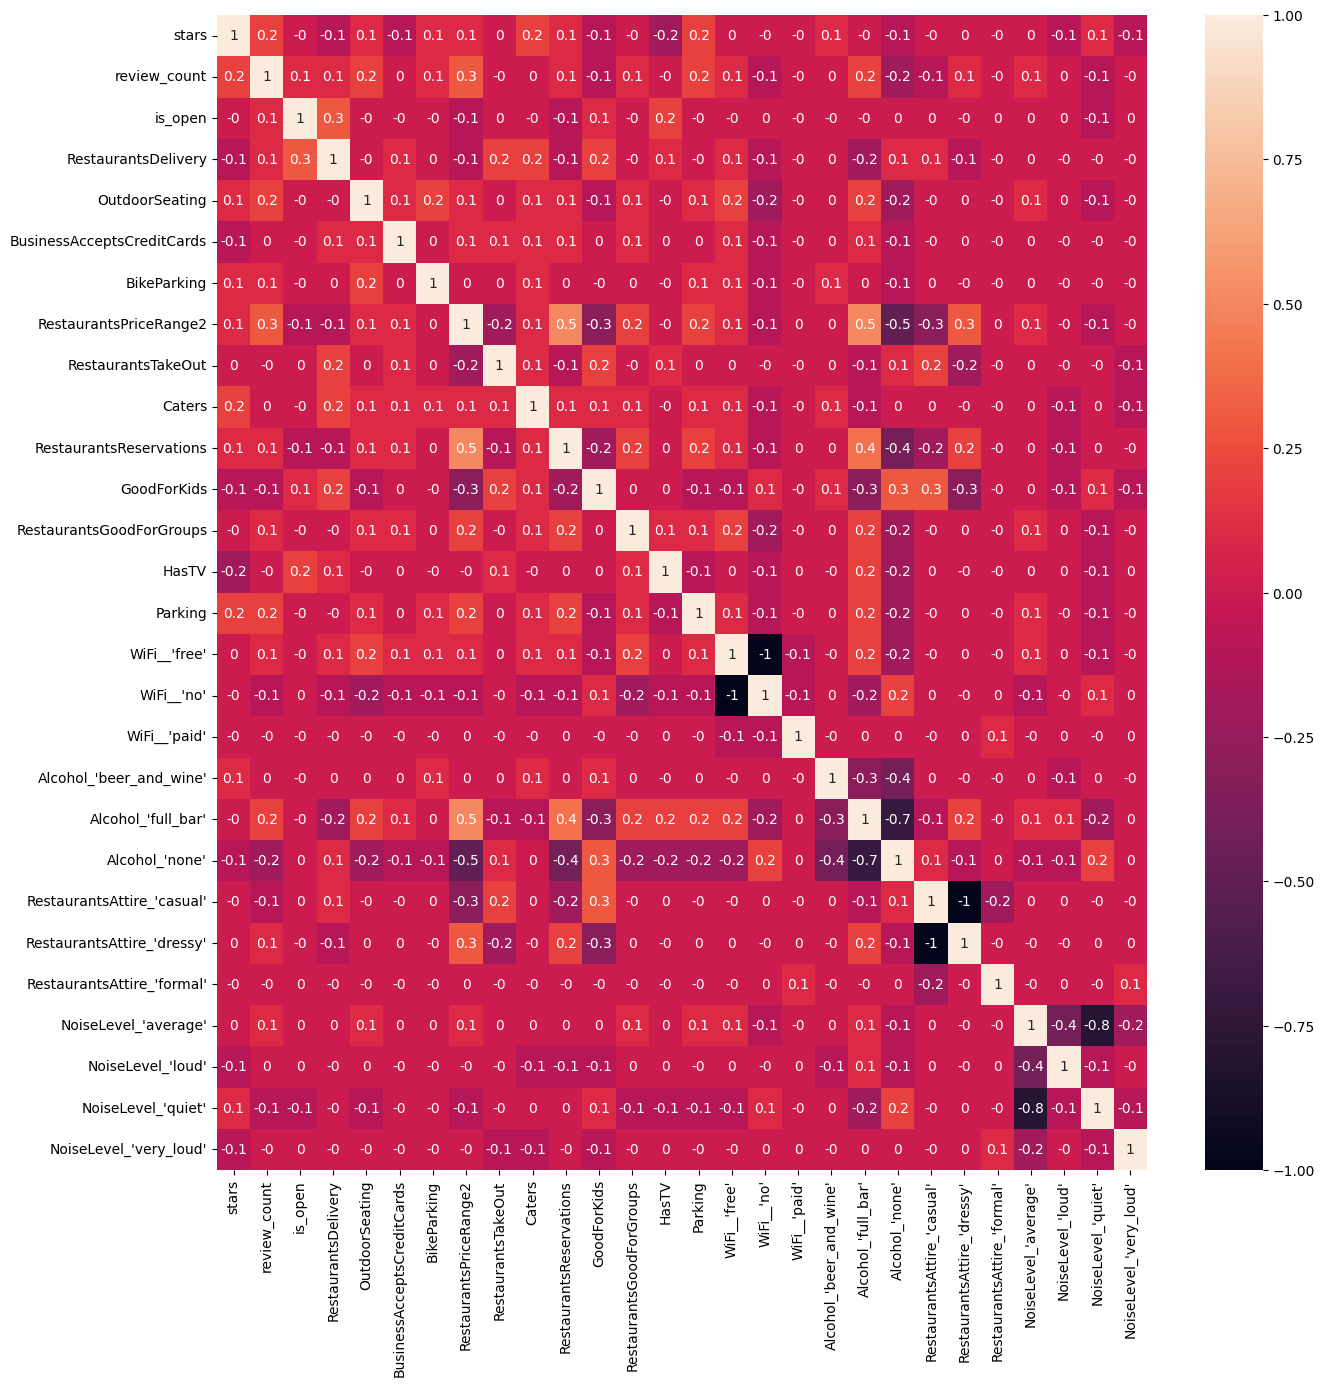

In [ ]:
# create a correlation matrix rounding to one decimal point
correlation_matrix = df_4.corr().round(1)
# print a correlation heat map
plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
#Separate the target value (rate) from the feature
X = df_4.drop('stars' , axis=1)
Y = df_4['stars']
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(32318, 27)
(8080, 27)
(32318,)
(8080,)


In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75]}] # test the listed alpha values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(Lasso(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.25}




In [ ]:
#Ridge regression
from sklearn.linear_model import Ridge

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75]}] # test the listed alpha values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(Ridge(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.75}




In [ ]:
#ElasticNet
from sklearn.linear_model import ElasticNet

tuned_parameters = [{'alpha': [0.25, 0.5, 0.75], # test the listed alpha values
                     'l1_ratio': [0.25, 0.5, 0.75]}] # test the listed L1 ratio values

scores = ['neg_root_mean_squared_error'] # test for RMSE

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(ElasticNet(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for neg_root_mean_squared_error


Best parameters set found on the training set:
{'alpha': 0.75, 'l1_ratio': 0.25}




In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'criterion': ['squared_error', 'friedman_mse'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

scores = ['f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    reg = GridSearchCV(DTR(), tuned_parameters, cv=5,
                       scoring= score)
    reg.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(reg.best_params_)
    print("\n")


# Tuning hyperparameters for f1_macro




串流輸出內容已截斷至最後 5000 行。
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/pyt

Best parameters set found on the training set:
{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 3}




In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# fit the LR model to the training data
lin_model = LinearRegression()

# fit the Lasso model
l1_model = Lasso(alpha=0.25)

# fit the Ridge model
l2_model = Ridge(alpha=0.75)

# fit the ElasticNet model
enet = ElasticNet(alpha=0.75, l1_ratio=0.25)

# fit the DTR model
tree_model = DTR(criterion='squared_error', max_depth=3, max_features='sqrt', min_samples_split=3)

# fit the random forest
rf = RandomForestRegressor(n_estimators=100, random_state=30)


# make a list of models to iterate (loop) through
models = [lin_model, l1_model, l2_model, enet, tree_model, rf]

for model in models:
  # fit model
  fitted_model = model.fit(X_train, Y_train)


  # predict every Y value in the dataset
  boston_predict = fitted_model.predict(X_train)

  # calculate RMSE (root mean square error) and R^2 (predictive power)
  from sklearn.metrics import mean_squared_error, r2_score
  rmse = (np.sqrt(mean_squared_error(Y_train, boston_predict)))
  r2 = r2_score(Y_train, boston_predict)

  # print the performance metrics
  print(f' {model} - Model performance')
  print("--------------------------------------")
  print(f'RMSE is {rmse}')
  print(f'R2 score is {r2}')
  print('\n')

 LinearRegression() - Model performance
--------------------------------------
RMSE is 0.6316726958613251
R2 score is 0.21530260747429264


 Lasso(alpha=0.25) - Model performance
--------------------------------------
RMSE is 0.6988448408632034
R2 score is 0.03953946058053437


 Ridge(alpha=0.75) - Model performance
--------------------------------------
RMSE is 0.6316727191000514
R2 score is 0.21530254973752982


 ElasticNet(alpha=0.75, l1_ratio=0.25) - Model performance
--------------------------------------
RMSE is 0.6988444546105488
R2 score is 0.03954052227637561


 DecisionTreeRegressor(max_depth=3, max_features='sqrt', min_samples_split=3) - Model performance
--------------------------------------
RMSE is 0.6775234150899309
R2 score is 0.09725182804614252


 RandomForestRegressor(random_state=30) - Model performance
--------------------------------------
RMSE is 0.19399533009160405
R2 score is 0.9259882708262285




In [ ]:
#Random Forest regression is the best model

# predict the data
tree_predict = rf.predict(X_test)
# calculate RMSE (root mean square error) and R^2 (predictive power)
rmse = (np.sqrt(mean_squared_error(Y_test, tree_predict)))
r2 = r2_score(Y_test, tree_predict)

# print the performance metrics
print("Model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Model performance
--------------------------------------
RMSE is 0.38338624025041335
R2 score is 0.7084308237229922




In [ ]:
# Feature Importance Analysis
feature_importances = rf.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%s): %f" % (f + 1, indices[f], features[indices[f]], feature_importances[indices[f]]))

Feature ranking:
1. feature 0 (review_count): 0.417678
2. feature 8 (Caters): 0.059033
3. feature 2 (RestaurantsDelivery): 0.049226
4. feature 6 (RestaurantsPriceRange2): 0.038967
5. feature 3 (OutdoorSeating): 0.038414
6. feature 5 (BikeParking): 0.036418
7. feature 12 (HasTV): 0.034232
8. feature 1 (is_open): 0.030706
9. feature 13 (Parking): 0.030177
10. feature 9 (RestaurantsReservations): 0.029990
11. feature 18 (Alcohol_'full_bar'): 0.029973
12. feature 11 (RestaurantsGoodForGroups): 0.025438
13. feature 14 (WiFi__'free'): 0.022864
14. feature 15 (WiFi__'no'): 0.021258
15. feature 25 (NoiseLevel_'quiet'): 0.019955
16. feature 10 (GoodForKids): 0.018964
17. feature 19 (Alcohol_'none'): 0.016409
18. feature 23 (NoiseLevel_'average'): 0.015396
19. feature 17 (Alcohol_'beer_and_wine'): 0.012223
20. feature 7 (RestaurantsTakeOut): 0.011956
21. feature 24 (NoiseLevel_'loud'): 0.011882
22. feature 4 (BusinessAcceptsCreditCards): 0.011713
23. feature 26 (NoiseLevel_'very_loud'): 0.011484

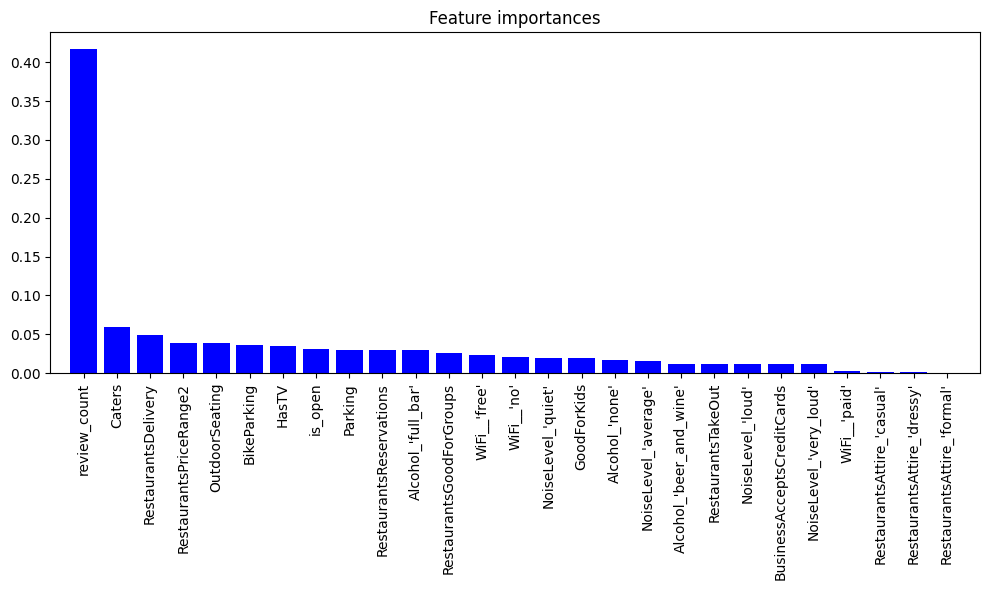

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Analysis
correlation_matrix = df_4.corr()
correlation_with_target = correlation_matrix['stars'].sort_values(ascending=False)
print("Correlation with target variable:")
print(correlation_with_target)

Correlation with target variable:
stars                         1.000000
review_count                  0.195562
Parking                       0.195272
Caters                        0.167588
BikeParking                   0.148916
Alcohol_'beer_and_wine'       0.138495
OutdoorSeating                0.132988
RestaurantsReservations       0.124240
RestaurantsPriceRange2        0.115521
NoiseLevel_'quiet'            0.078474
RestaurantsAttire_'dressy'    0.048287
NoiseLevel_'average'          0.033180
RestaurantsTakeOut            0.028386
WiFi__'free'                  0.004400
WiFi__'no'                   -0.001390
RestaurantsAttire_'formal'   -0.003863
is_open                      -0.013551
RestaurantsGoodForGroups     -0.015132
WiFi__'paid'                 -0.020806
Alcohol_'full_bar'           -0.026018
RestaurantsAttire_'casual'   -0.046520
GoodForKids                  -0.056822
Alcohol_'none'               -0.074385
BusinessAcceptsCreditCards   -0.099103
NoiseLevel_'loud'            -

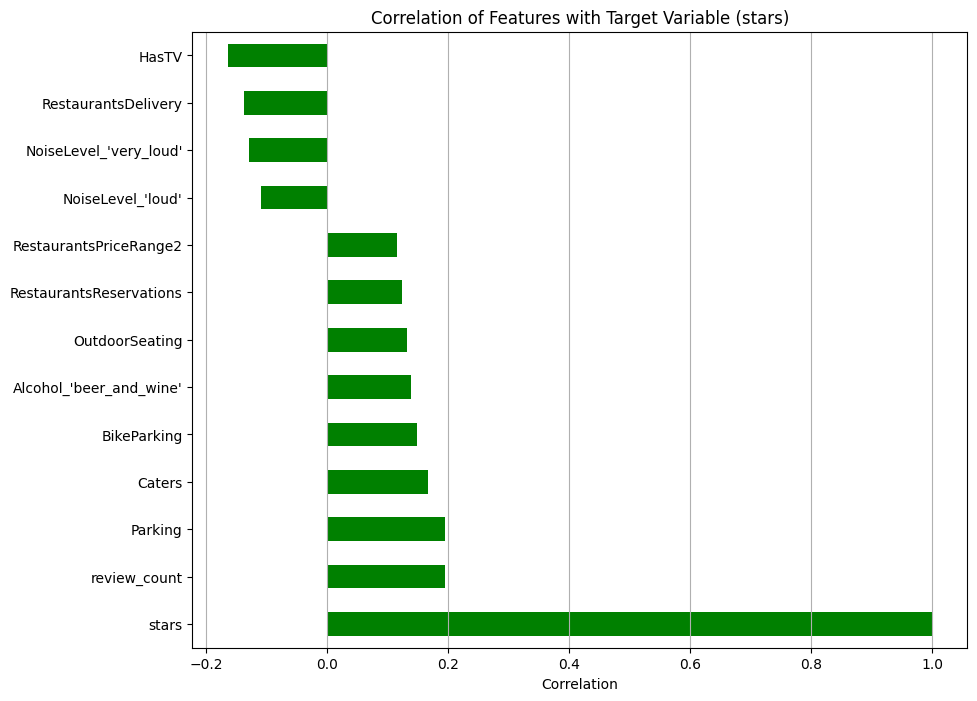

In [ ]:
import matplotlib.pyplot as plt

#Select features with absolute correlation values greater than 0.1
significant_correlation = correlation_with_target[abs(correlation_with_target) > 0.1]

# Plot
plt.figure(figsize=(10, 8))
significant_correlation.plot(kind='barh', color='green')
plt.xlabel('Correlation')
plt.title('Correlation of Features with Target Variable (stars)')
plt.grid(axis='x')
plt.show()